**#Task 1: Try the algo on Same Weather dataset - OneHotEn-coding of features:and Train test Division 95%-5%**

In [1]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import pandas as pd
import numpy as np
import math
eps = np.finfo(float).eps
from numpy import log2 as log

In [2]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 
           'Sunny', 'Sunny', 'Sunny', 
           'Overcast','Rainy', 'Rainy', 
           'Sunny', 'Rainy','Overcast', 
           'Overcast', 'Sunny']

Temperature = ['Hot', 'Hot', 'Hot', 
               'Mild', 'Cool', 'Cool', 
               'Cool', 'Mild', 'Cool', 
               'Mild', 'Mild', 'Mild', 
               'Hot', 'Mild']

Humidity = ['High', 'High', 'High', 
            'High', 'Normal', 'Normal', 
            'Normal','High', 'Normal', 
            'Normal', 'Normal', 'High', 
            'Normal', 'High']

Wind = ['False', 'True', 'False', 
        'False', 'False', 'True', 
        'True', 'False', 'False', 
        'False', 'True', 'True', 
        'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 
        'Yes', 'Yes', 'No', 
        'Yes', 'No', 'Yes', 
        'Yes', 'Yes', 'Yes', 
        'Yes', 'No']

In [3]:
#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)

Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)

Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)

Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)

Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)

print("\n\n")
print("Weather:" ,Outlook_encoded)
print("Temperature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)

Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}



Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temperature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [4]:
data = pd.DataFrame({'Weather': Outlook_encoded, 
                     'Temperature': Temperature_encoded,
                     'Humidity' : Humidity_encoded,
                     'Wind' : Wind_encoded})
data

,Weather,Temperature,Humidity,Wind
0,1,1,0,0
1,1,1,0,1
2,0,1,0,0
3,2,2,0,0
4,2,0,1,0
5,2,0,1,1
6,0,0,1,1
7,1,2,0,0
8,1,0,1,0
9,2,2,1,0


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(data, Play_encoded, test_size = .05, random_state = 128)

In [6]:
clf = DecisionTreeClassifier(random_state=128)
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas = path.ccp_alphas


In [7]:
ccp_alphas

array([0.        , 0.10909091, 0.12272727, 0.15495868])

In [8]:
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=128, ccp_alpha=ccp_alpha)
  clf.fit(X_train, Y_train)
  clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.1549586776859505


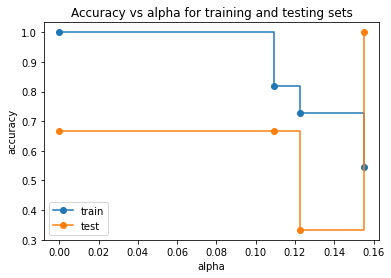

In [9]:
from matplotlib import pyplot as plt

train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [10]:
clf = DecisionTreeClassifier(ccp_alpha=0.03, criterion='gini')
clf.fit(X_train, Y_train)

# Predict Output
y_train_pred = clf.predict(X_train)
print("y_train_pred: ",y_train_pred)
y_test_pred = clf.predict(X_test)
print("y_test_pred : ",y_test_pred)

y_train_pred:  [1 1 1 1 0 1 1 0 0 0 0]
y_test_pred :  [1 0 1]


In [11]:
# Calculate Accuracy and Confusion Matrix
from sklearn.metrics import accuracy_score
print ("Training Accuracy : \n",accuracy_score(Y_train,y_train_pred)*100)
print ("Testing Accuracy : \n",accuracy_score(Y_test,y_test_pred)*100)

Training Accuracy : 
 100.0
Testing Accuracy : 
 66.66666666666666


In [12]:
# 1 What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Normal’, and Wind = ’False’?
pred = clf.predict([[1,2,1,0]])
print("pred: ",pred)

pred:  [0]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [13]:
# 2 What will be the value of Play, if Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity =’High’, and Wind = ’True’?
pred = clf.predict([[2,0,0,1]])
print("pred: ",pred)

pred:  [0]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


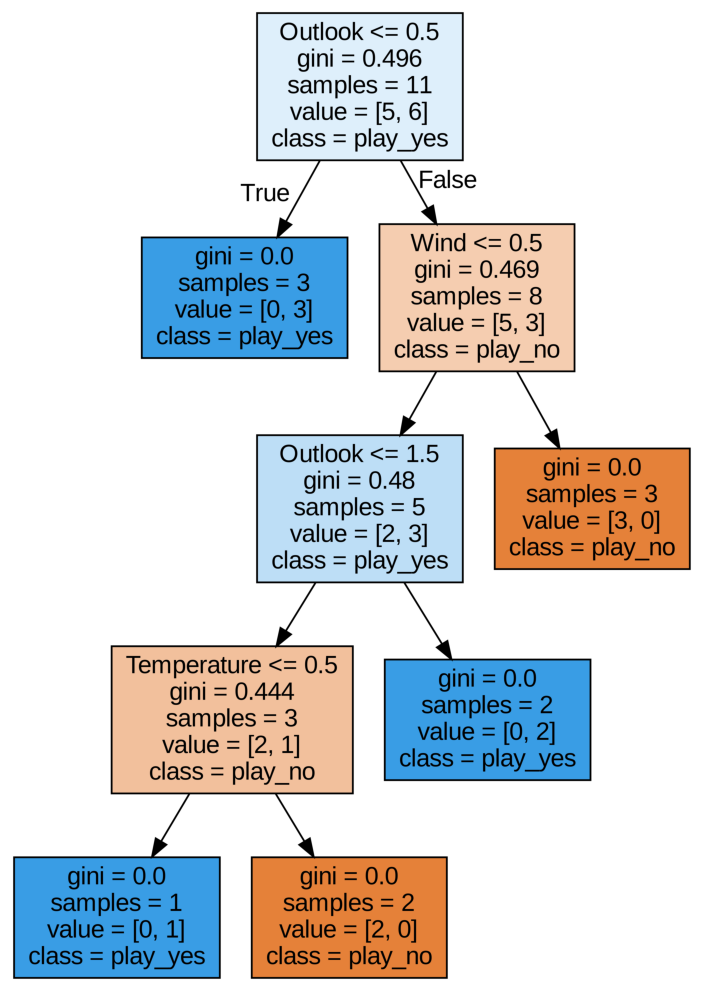

In [14]:
# 3 Plot the decision tree generated by the model for weather dataset. What were the values of criterion, max_depth during model generation.

from sklearn.tree import export_graphviz
export_graphviz(clf,out_file='tree.dot',feature_names=['Outlook','Temperature','Humidity','Wind'],class_names=['play_no','play_yes'],filled=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png','-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();

**#Task 2: Apply algorithm on breast cancer wisconsin dataset - One Hot Encoding of features: and Train test Division 66%-34%**

In [15]:
from sklearn import datasets

breastCancer = datasets.load_breast_cancer()
X1 = breastCancer.data
y1 = breastCancer.target

In [16]:
feature_names = breastCancer.feature_names
target_names = breastCancer.target_names
print("Feature names:", feature_names)
print()
print("Target names:", target_names)

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target names: ['malignant' 'benign']


In [17]:
#import the necessary module
from sklearn.model_selection import train_test_split

#split data set into train and test sets
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1,y1, test_size = 0.34, random_state = 128)

In [18]:
clf = DecisionTreeClassifier(random_state=128)
path = clf.cost_complexity_pruning_path(X_train1, Y_train1)
ccp_alphas = path.ccp_alphas

In [19]:
ccp_alphas

array([0.        , 0.00349898, 0.00528169, 0.00696812, 0.00729866,
       0.02594514, 0.06023095, 0.35182614])

In [20]:
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=128, ccp_alpha=ccp_alpha)
  clf.fit(X_train1, Y_train1)
  clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3518261381704829


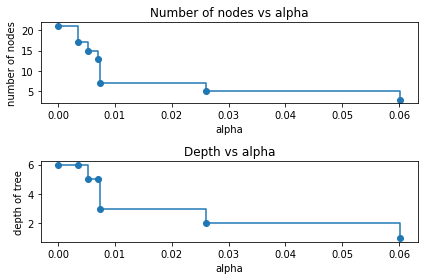

In [21]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

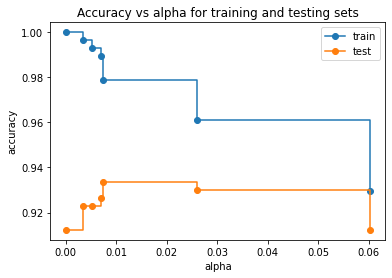

In [22]:
train_scores = [clf.score(X_train1, Y_train1) for clf in clfs]
test_scores = [clf.score(X_test1, Y_test1) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [23]:
clf = DecisionTreeClassifier(ccp_alpha=0.01, criterion='gini')
clf.fit(X_train1, Y_train1)

# Predict Output
y_train_pred1 = clf.predict(X_train1)
print("y_train_pred: ",y_train_pred1)
y_test_pred1 = clf.predict(X_test1)
print("y_test_pred : ",y_test_pred1)

y_train_pred:  [0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0
 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1
 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1
 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1
 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0
 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1
 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1]
y_test_pred :  [1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1
 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0
 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1
 0 0 1 1 1 0 0 1 1

In [24]:
# Calculate Accuracy and Confusion Matrix

print ("Training Accuracy : \n",accuracy_score(Y_train1,y_train_pred1)*100)
print ("Testing Accuracy : \n",accuracy_score(Y_test1,y_test_pred1)*100)

Training Accuracy : 
 97.88732394366197
Testing Accuracy : 
 93.33333333333333


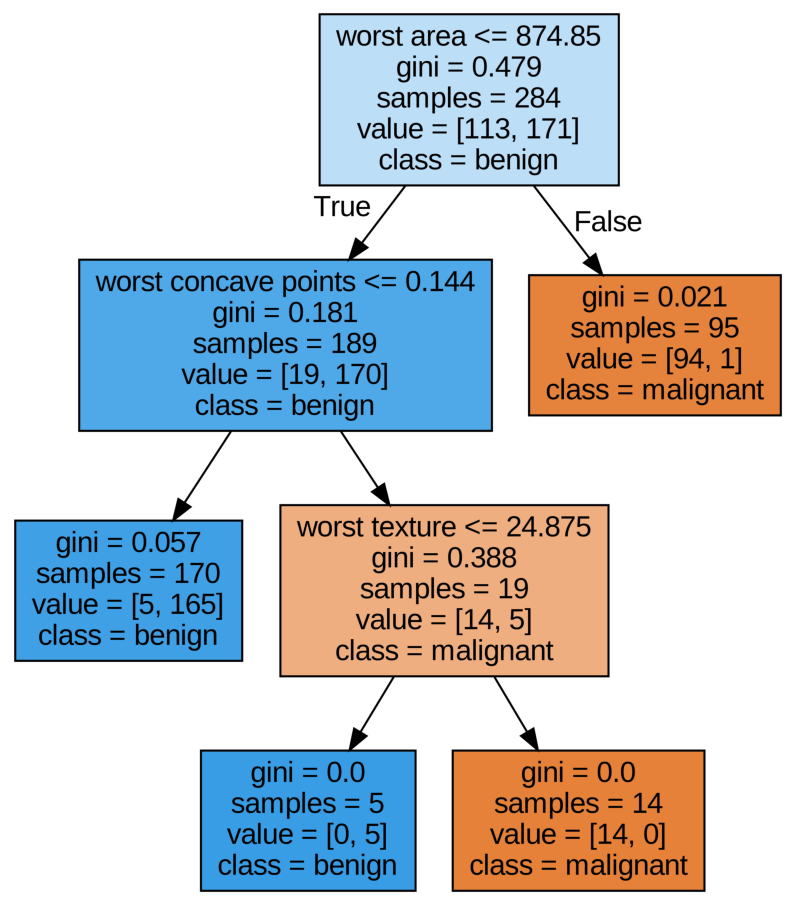

In [25]:
from sklearn.tree import export_graphviz
export_graphviz(clf,out_file='tree.dot',feature_names=feature_names,class_names=target_names,filled=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png','-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();

**7. Implement the Decision Tree classifier on Iris dataset and find the ccp_alpha values
associated with the decision tree generated.**

In [26]:
# Load dataset
iris = datasets.load_iris()

In [27]:
# separate features and class label

X2 = iris.data
y2 = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
print("Feature names:", feature_names)
print("Target names:", target_names)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [28]:
# Split data into test data and train data

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.5 , random_state = 128)

In [29]:
clf = DecisionTreeClassifier(random_state=128)
path = clf.cost_complexity_pruning_path(X_train2, y_train2)
ccp_alphas = path.ccp_alphas

In [30]:
ccp_alphas

array([0.        , 0.00888889, 0.01422222, 0.01669565, 0.02571429,
       0.25918483, 0.32844967])

In [31]:
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=128, ccp_alpha=ccp_alpha)
  clf.fit(X_train2, y_train2)
  clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3284496732026143


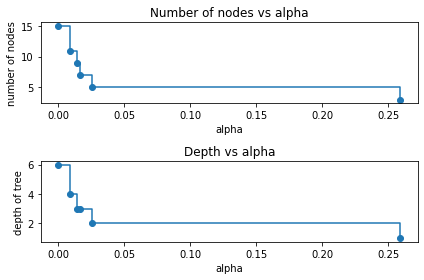

In [32]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

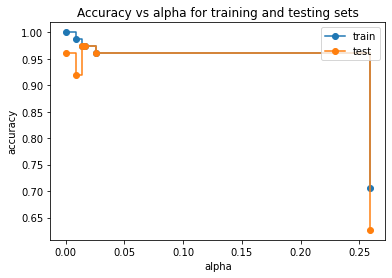

In [33]:
train_scores = [clf.score(X_train2, y_train2) for clf in clfs]
test_scores = [clf.score(X_test2, y_test2) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [34]:
clf = DecisionTreeClassifier(ccp_alpha=0.015, criterion='gini')
clf.fit(X_train2, y_train2)

DecisionTreeClassifier(ccp_alpha=0.015)

In [35]:
# Predict Output
y_train_pred2 = clf.predict(X_train2)
print("y_train_pred: ",y_train_pred2)
y_test_pred2 = clf.predict(X_test2)
print("y_test_pred : ",y_test_pred2)

y_train_pred:  [1 2 0 2 1 2 1 0 2 1 0 1 1 0 2 2 1 1 1 2 0 2 0 2 1 0 1 0 0 0 0 2 0 1 2 2 1
 2 1 1 1 0 2 0 2 0 0 1 1 2 1 1 0 1 0 2 2 1 0 0 2 2 2 0 0 1 0 2 2 1 0 1 1 1
 2]
y_test_pred :  [2 2 1 0 2 2 0 2 2 0 1 1 2 0 1 0 0 0 1 1 0 0 2 2 2 0 2 0 0 1 2 1 2 2 2 0 1
 0 2 2 1 1 2 0 1 1 2 0 2 0 1 1 1 0 0 1 0 2 0 2 0 0 2 1 2 0 1 1 2 0 1 1 2 0
 1]


In [36]:
# Calculate Accuracy and Confusion Matrix

print ("Training Accuracy : \n",accuracy_score(y_train2,y_train_pred2)*100)
print ("Testing Accuracy : \n",accuracy_score(y_test2,y_test_pred2)*100)

Training Accuracy : 
 97.33333333333334
Testing Accuracy : 
 97.33333333333334


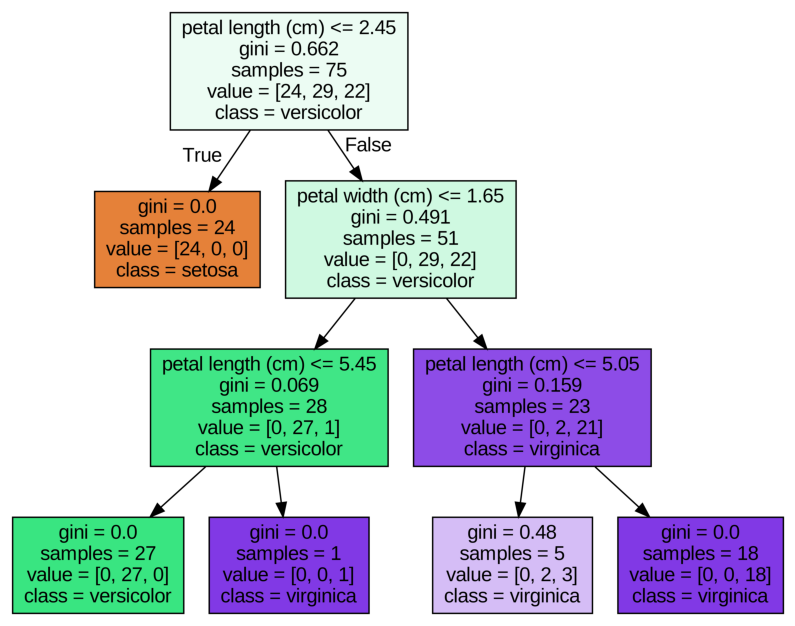

In [37]:
from sklearn.tree import export_graphviz
export_graphviz(clf,out_file='tree.dot',feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],class_names=['setosa','versicolor','virginica'],filled=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png','-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();